# Exercise 7.2
**Skylar Peven**
**DSC 530**
**01/26/2025**

**7.1**
Using data from the NSFG, make a scatter plot of birth weight versus mother’s age.

Plot percentiles of birth weight versus mother’s age.

Compute Pearson’s and Spearman’s correlations.

How would you characterize the relationship between these variables?

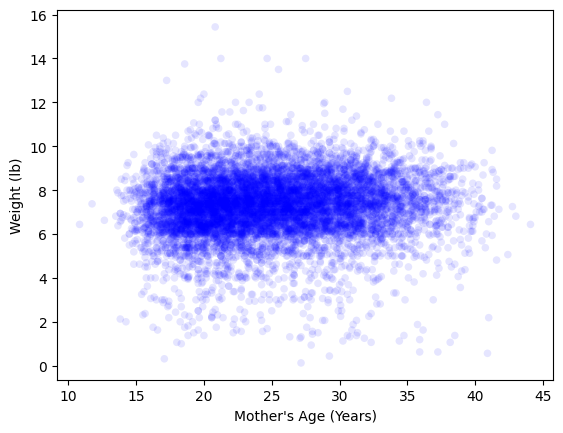

In [171]:
# Download the necessary data.
import thinkplot
import thinkstats2
import first
import numpy as np

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

# Downloads the python files neccasary for use with the course.
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

# Downloads the python files neccasary for this exercise.
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

# Reads pregnancy data and partitions first babies and others. Returns: DataFrames (all live births, first babies, others)
live, firsts, others = first.MakeFrames()

# Remove rows with NA
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

ages = live.agepreg
weights = live.totalwgt_lb

# Generate the scatterplot
thinkplot.Scatter(ages, weights, alpha=0.1)
thinkplot.Config(xlabel="Mother's Age (Years)",
                 ylabel='Weight (lb)',
                 legend=False)           

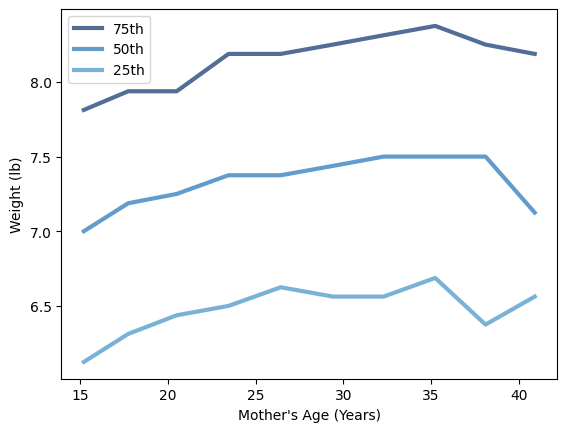

In [172]:
# Creates bins from 10 to 47 years in increments of 3 years
bins = np.arange(10, 48, 3)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

# List of mean mother ages
ages = [group.agepreg.mean() for i, group in groups][1:-1]

# List of cdf's of birth weights
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

# Plot percentiles of birth weight versus mother’s age
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights,label=label)
    thinkplot.Config(xlabel="Mother's Age (Years)",
                 ylabel='Weight (lb)',
                 legend=True)   


In [173]:
# Correlation Coefficients
print("Pearson's Correlation:", thinkstats2.Corr(ages, weights))
print("Spearman's Correlation:", thinkstats2.SpearmanCorr(ages, weights))  

Pearson's Correlation: 0.6249775245941285
Spearman's Correlation: 0.5828659631828563


***Explanation***

The scatterplot and both Pearson's and Spearman's correlation coefficients show a weak relationship between birth weight and mother's age. There is a small difference between the coefficients suggesting that some outliers exist in the dataset. The percentiles of weight vs age plot confirms a weak, non-linear relationship.


**8.1**

In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [174]:
import random

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)


def Estimate1(n=7, iters=100000):
    """Mean error for xbar and median as estimators of population mean.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)



    print('Mean Error xbar:', MeanError(means, mu))
    print('Mean Error Median:', MeanError(medians, mu))
    
Estimate1()

Mean Error xbar: -0.0017784367094514503
Mean Error Median: -0.0022620397538348027


Neither xbar or median appear to be biased based on the experiment. They both have extremely low mean errors.

In [175]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)


def Estimate2(n=7, iters=100000):
    """RMSE for biased and unbiased estimators of population variance.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1
    # Lists of estimates
    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE Biased', RMSE(estimates1, sigma**2))
    print('RMSE Unbiased', RMSE(estimates2, sigma**2))

Estimate2()

Experiment 2
RMSE Biased 0.5146568502949813
RMSE Unbiased 0.5772312222386446


The biased estimator of variance has a lower RMSE than the unbiased estimator.

**8.2**

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

Standard Error 0.8469211823180447
90% Confidence Interval: 1.2491014567136385 - 3.779212515975935


np.float64(0.8469211823180447)

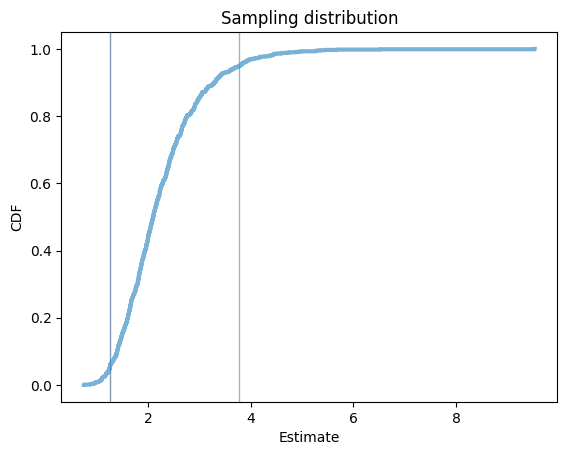

In [176]:
sterr_list = []
n_list = [10, 100, 1000, 10000]

def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)
    # RMSE
    sterr = RMSE(estimates, lam)
    # List of RMSE's tested
    sterr_list.append(sterr)

    print('Standard Error', sterr)

    cdf = thinkstats2.Cdf(estimates)

    # 90% Confidence Interval
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('90% Confidence Interval:', ci[0],  '-', ci[1])
    thinkplot.axvline(ci[0])
    thinkplot.axvline(ci[1])

    # Plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Estimate',
                     ylabel='CDF',
                     title='Sampling distribution')
    return sterr
SimulateSample()

Standard Error 0.20598378719368582
90% Confidence Interval: 1.7009651531563625 - 2.3878635813866254


np.float64(0.20598378719368582)

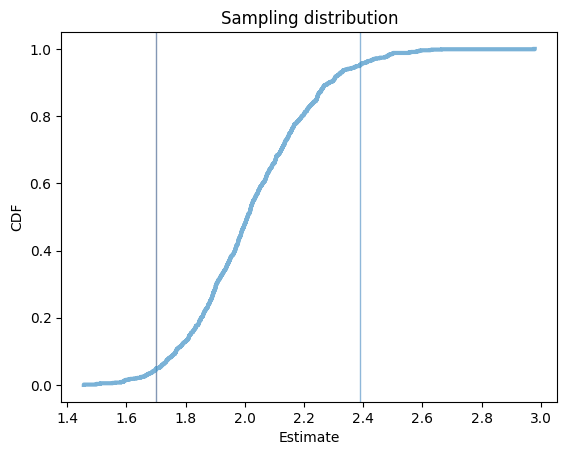

In [177]:
SimulateSample(n=100)

Standard Error 0.06296208511051528
90% Confidence Interval: 1.8998154153041829 - 2.1097421175990436


np.float64(0.06296208511051528)

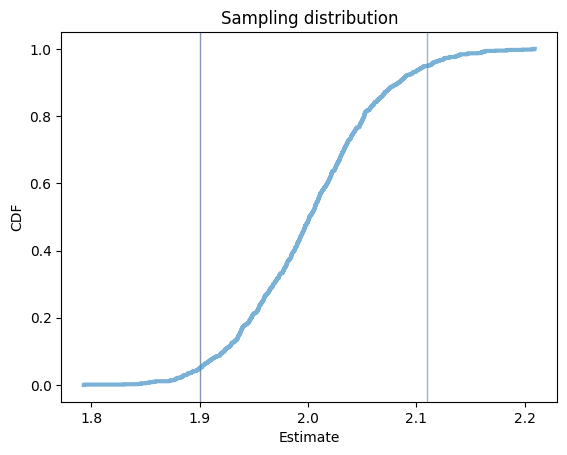

In [178]:
SimulateSample(n=1000)

Standard Error 0.01948797443104106
90% Confidence Interval: 1.9674048735735885 - 2.03096811193698


np.float64(0.01948797443104106)

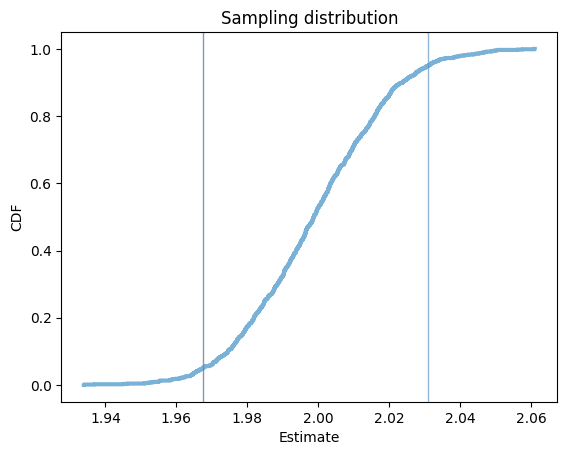

In [179]:
SimulateSample(n=10000)

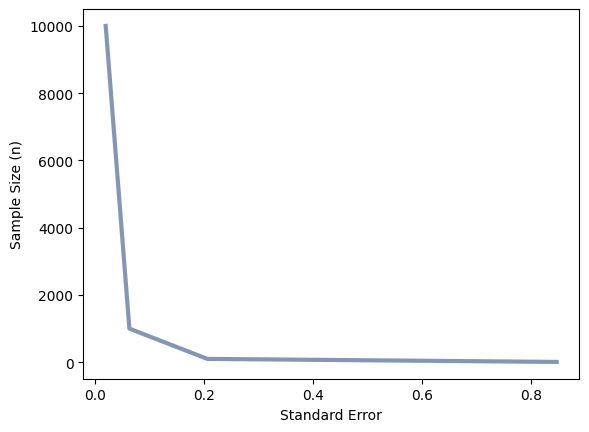

In [180]:
# Generate the plot
thinkplot.plot(sterr_list, n_list, alpha=0.5)
thinkplot.Config(xlabel="Standard Error",
                 ylabel='Sample Size (n)',
                 legend=False)           